In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.utils.data as data
import torchvision.transforms as transforms
import torch.nn.functional as F
import utils
import warnings
import model_1
import random
import os
import shutil
warnings.filterwarnings("ignore")

In [2]:
seed = 3
random.seed(seed)
torch.manual_seed(seed)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
AB_scale = 128
width = height = 256
batch_size = 32
datasets = ['anime','doberman','mariposas', 'landscapes']
indice_dataset = 1

In [4]:
img_transform = transforms.Compose([transforms.ToTensor()]) 
dataset = utils.LabDataSet(f'data/{datasets[indice_dataset]}_{width}',
                img_transform, train_size=2100, test_size=189, height=height, width=width, seed=seed)

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=dataset.train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=dataset.test_set, batch_size=batch_size, shuffle=False)

In [ ]:
learning_rate = 1e-3
autoencoder = model_1.Autoencoder()
autoencoder.to(device)

loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate)

autoencoder.train()
train_loss_result, test_loss_result = utils.train(device,autoencoder,train_loader,test_loader,1000,loss, optimizer, height, width)

In [6]:
model = model_1.Autoencoder()
model.load_state_dict(torch.load(f'models/doberman_256_arch1/model.pt', map_location=torch.device('cpu') ))
model.eval()

Autoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_latent): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1Stride): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2Stride): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv3Stride): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv4Stride): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Decoder(
    (conv_latent): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(12

In [7]:
model.to(device)

Autoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_latent): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1Stride): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2Stride): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv3Stride): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv4Stride): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Decoder(
    (conv_latent): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(12

In [13]:
train_loss_result = open("models/doberman_256_arch1/train_loss.txt","r").readlines()
test_loss_result = open("models/doberman_256_arch1/test_loss.txt","r").readlines()

In [14]:
utils.save_model(device, model, "doberman_256_arch1_v2", train_loss_result, test_loss_result, train_loader, test_loader, height=height, width=width)

: 

: 

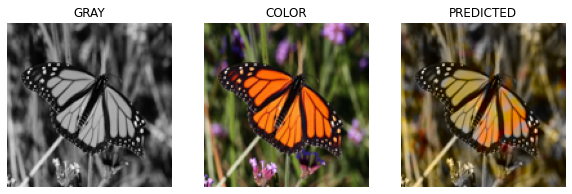

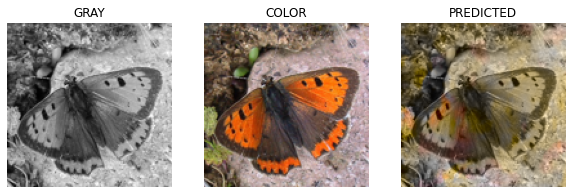

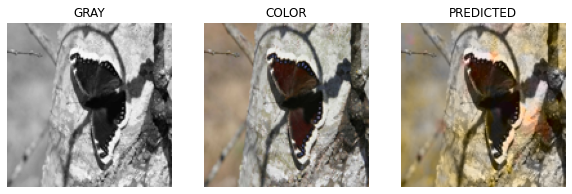

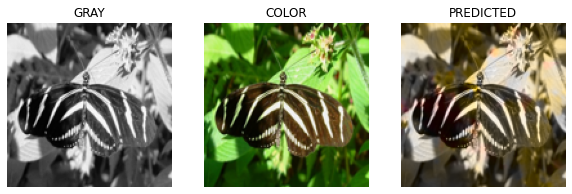

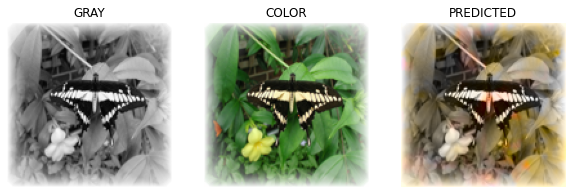

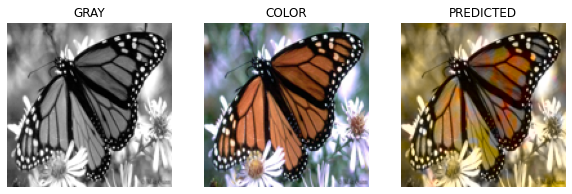

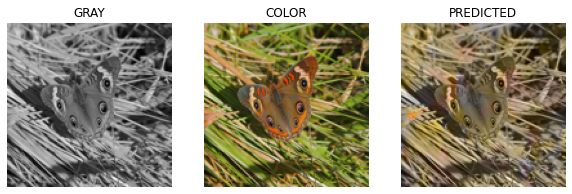

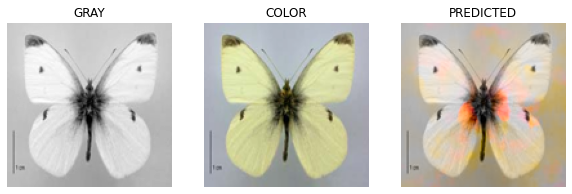

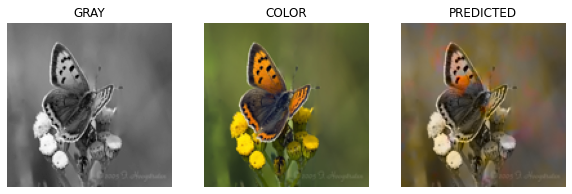

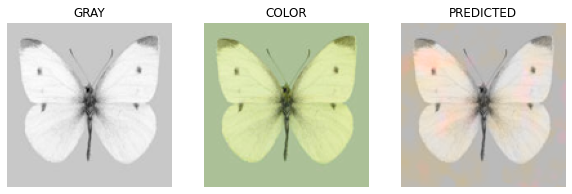

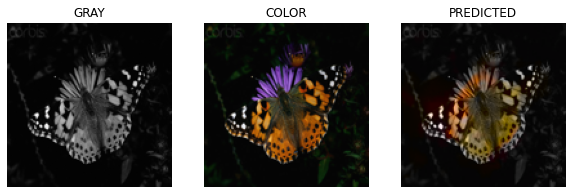

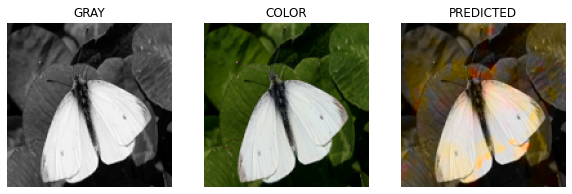

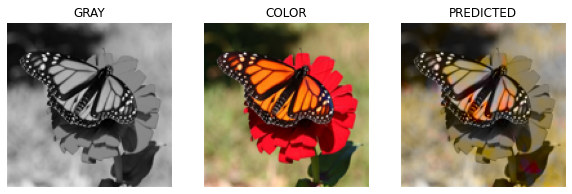

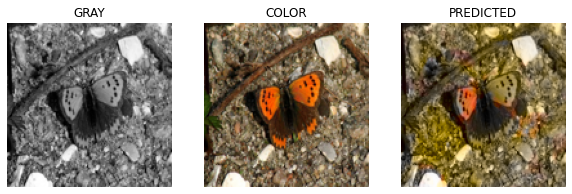

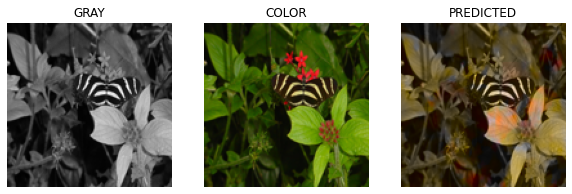

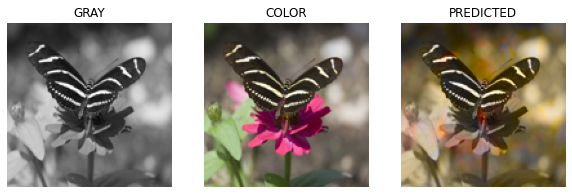

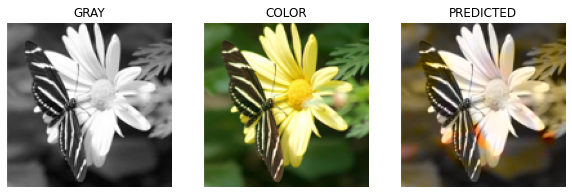

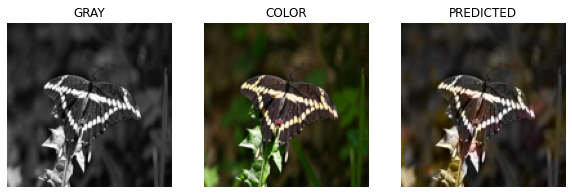

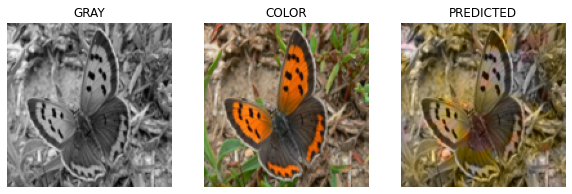

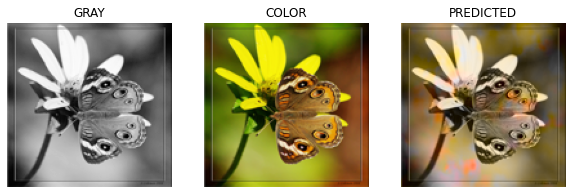

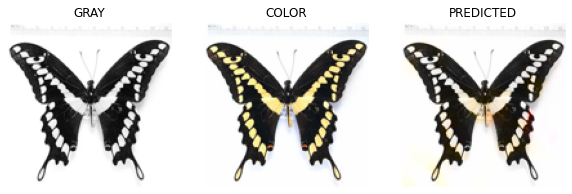

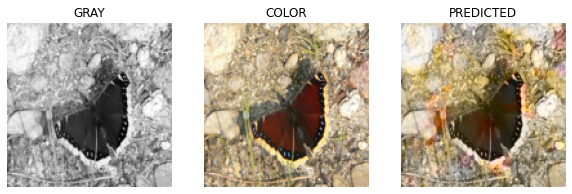

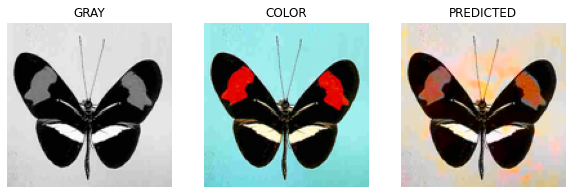

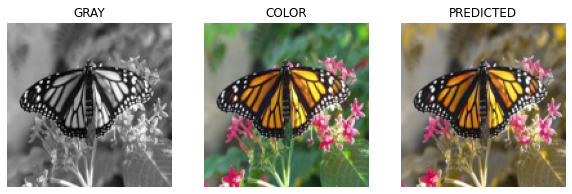

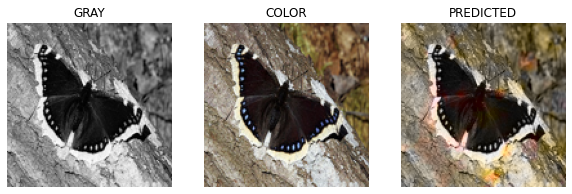

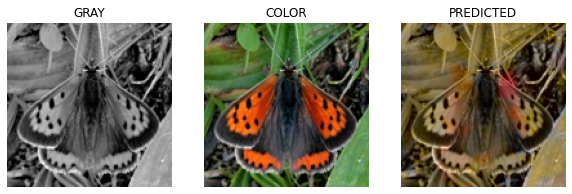

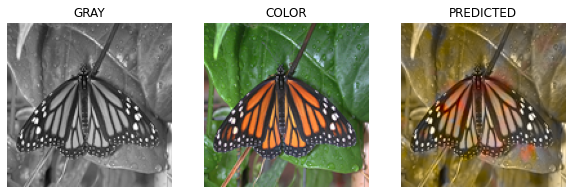

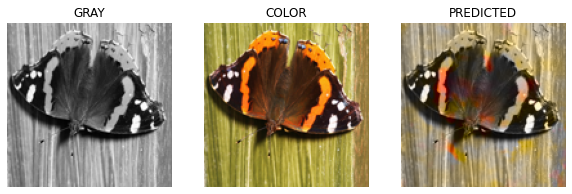

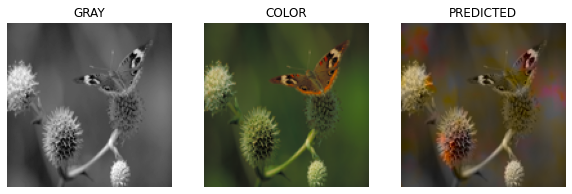

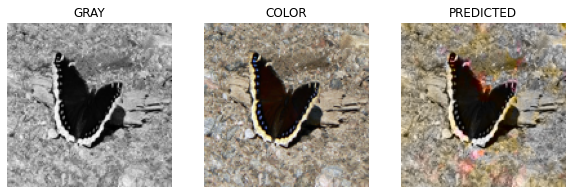

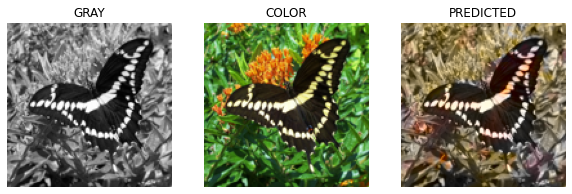

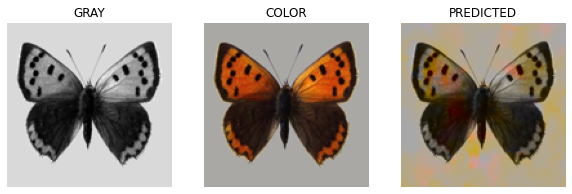

In [ ]:
utils.plot_batch(device, test_loader, autoencoder, height=height, width=width, step = 1)
